# 1 导入库

In [101]:
import torch
import matplotlib.pyplot as plt
import random
print("111")

111


# 2 数据生成

因为这是最简单的模型，因此数据是随机生成的
x有四个维度，总共500行数据，x的形状是[1,2,3,4],[1,2,3,4],····,[1,2,3,4].因此w也是四个维度
y = w * x + b

In [102]:
def data_create(w, b, data_num):
    x = torch.normal(0, 1, (data_num, len(w)))
    y = torch.matmul(x, w) + b
    #噪声
    noise = torch.normal(0, 0.001, y.shape)
    y += noise
    return x, y

# 3 数据提取
以16个为一组提取并输出数据

In [103]:
def data_provider(data, labels, batch_size):
    num = len(data)
    index = list(range(num))
    random.shuffle(index) # 打乱数据
    for each in range(0, num, batch_size):
        get_indices = index[each:each + batch_size]
        get_data = data[get_indices]
        get_label = labels[get_indices]
        yield get_data, get_label

# 4 模型搭建
## 4.1 输出预测值

In [104]:
def fun(x, w, b):
    y = torch.matmul(x, w) + b
    return y

## 4.3 计算损失函数

In [105]:
def loss(y_pred, y):
    return torch.sum(abs(y-y_pred)) / len(y)

## 4.4 优化器

In [106]:
def sgd(paras, lr):
    with torch.no_grad():
        for para in paras:
            para -= lr * para.grad
            para.grad.zero_()


# 5 生成训练数据

In [107]:
num = 500
true_w = torch.tensor([8.1, 2, 2, 4])
ture_b = torch.tensor(1.1)
x, y = data_create(true_w, ture_b, num)

# 6 模型参数

In [118]:
lr = 0.1
w = torch.normal(0, 0.01, true_w.shape, requires_grad=True)
b = torch.tensor(0.01, requires_grad=True)

# 7 训练模型

In [119]:
epochs = 50
batch_size = 16
for epoch in range(epochs):
    for x, y in data_provider(x, y, batch_size):
        y_pred = fun(x, w, b)
        l = loss(y_pred, y)
        l.backward()
        sgd([w, b], lr)
        print(f"epoch:{epoch}, loss:{l}")

epoch:0, loss:15.812511444091797
epoch:1, loss:15.483283996582031
epoch:2, loss:15.154058456420898
epoch:3, loss:14.82483196258545
epoch:4, loss:14.495607376098633
epoch:5, loss:14.166380882263184
epoch:6, loss:13.837154388427734
epoch:7, loss:13.507927894592285
epoch:8, loss:13.178702354431152
epoch:9, loss:12.849475860595703
epoch:10, loss:12.520249366760254
epoch:11, loss:12.191023826599121
epoch:12, loss:11.861797332763672
epoch:13, loss:11.532570838928223
epoch:14, loss:11.20334529876709
epoch:15, loss:10.87411880493164
epoch:16, loss:10.544893264770508
epoch:17, loss:10.215665817260742
epoch:18, loss:9.88644027709961
epoch:19, loss:9.557214736938477
epoch:20, loss:9.227988243103027
epoch:21, loss:8.898761749267578
epoch:22, loss:8.569535255432129
epoch:23, loss:8.240309715270996
epoch:24, loss:7.911083698272705
epoch:25, loss:7.581857681274414
epoch:26, loss:7.252631187438965
epoch:27, loss:6.923404693603516
epoch:28, loss:6.594178199768066
epoch:29, loss:6.264951705932617
epoch:

# 8 画图

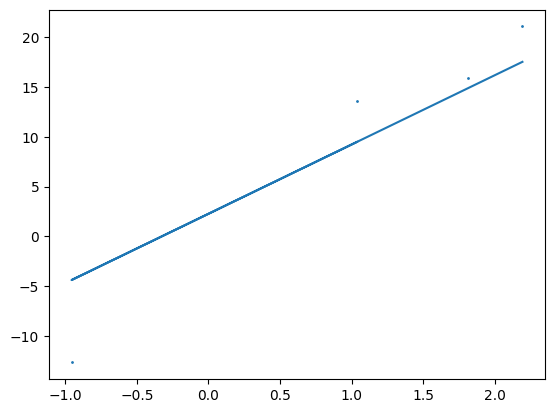

In [120]:
idx = 0
plt.plot(torch.detach(x[:, idx]), torch.detach(x[:,idx]*w[idx]+b))
plt.scatter(torch.detach(x[:, idx]), torch.detach(y),1)
plt.show()